In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np    

In [2]:
def convert_labels(x):
    items = x
    for index, item in enumerate(items):
        if (item ==1):
            items[index] = 'Λίγο'
        elif (item ==2):
            items[index] = 'Μέτριο'
        elif (item ==3):
            items[index] = 'Καλή'
        elif (item ==4):
            items[index] = 'Πολύ Καλή'
        elif (item ==5):
            items[index] = 'Άριστη'   
            
            
    return items

In [3]:
def bar2(x,y,k): #https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    labels2=x
    numbers=y
    title =k
    def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    z = np.arange(len(labels2))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(z - width/2, numbers, width)
    ax.set_ylabel('Βαθμολογία')
    ax.set_title('Συγκεντρωτική Αποτύπωση Αξιολόγησης Καθηγητή '+title)
    ax.set_xticks(z)
    ax.set_xticklabels(labels)
    autolabel(rects1)
    fig.tight_layout()
    
    fig.savefig('Bar chart_'+title+'.png', bbox_inches='tight')
    
def plot_pie(x,y,k):  #https://stackoverflow.com/questions/35488666/matplotlib-pandas-pie-chart-label-mistakes  
    
    labels2=x
    numbers=y
    title=k
    fig1, ax1 = plt.subplots()
    group_names = labels2

    counts = pd.Series(numbers, 
                   index=labels2)

    explode = (0.9, 0.9, 0, 0, 0)

    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
    counts.plot(kind='pie', fontsize=10, colors=colors, explode=explode,autopct='%1.1f%%', shadow=True, startangle=140,figsize=(11, 6))
    plt.axis('equal')
    plt.ylabel('')
    
    plt.legend(labels=counts.index, loc="best")
    plt.title("Ποσοστό βαθμολογίας για καθηγητή " +title +"\n")
    plt.show()
    val = str(x)
    
    fig1.savefig('Pie chart_'+title+'.png', bbox_inches='tight')
    

In [4]:
filenames = glob('*.csv')
dataframes = [pd.read_csv(f) for f in filenames]

for x in range(len(dataframes)):
 dataframes[x] = dataframes[x].loc[:, dataframes[x].columns.intersection(['Q01','Q02','Q03','Q04','Q05'])]



for x in range(len(dataframes)):


    dataframes[x]['Q01']=dataframes[x]['Q01'].str.replace(r'\D', '').astype(int)
    dataframes[x]['Q02']=dataframes[x]['Q02'].str.replace(r'\D', '').astype(int)
    dataframes[x]['Q03']=dataframes[x]['Q03'].str.replace(r'\D', '').astype(int)
    dataframes[x]['Q04']=dataframes[x]['Q04'].str.replace(r'\D', '').astype(int)
    dataframes[x]['Q05']=dataframes[x]['Q05'].str.replace(r'\D', '').astype(int)
    

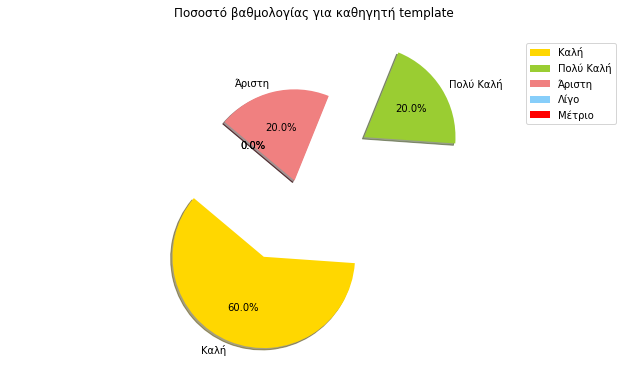

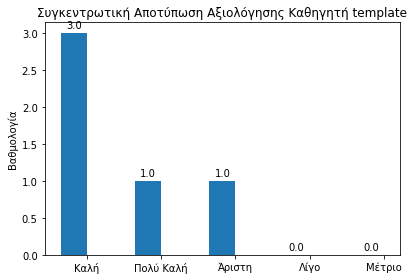

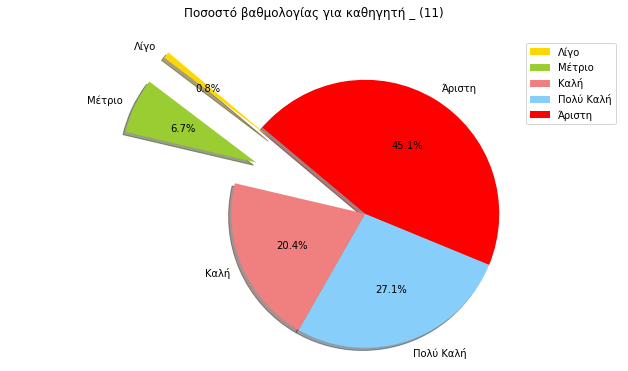

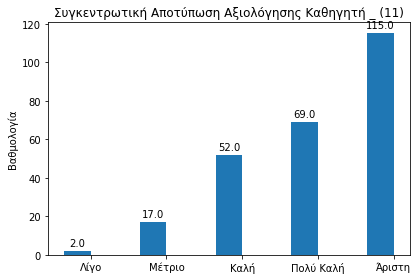

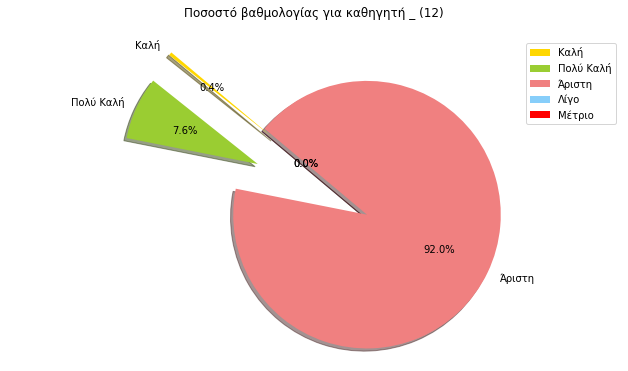

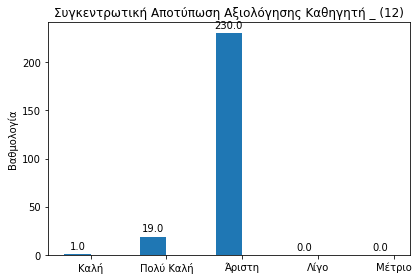

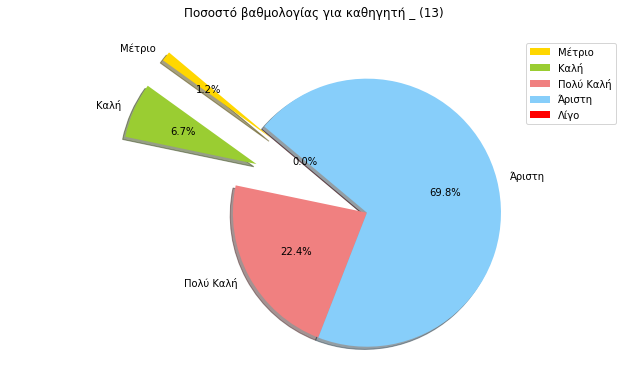

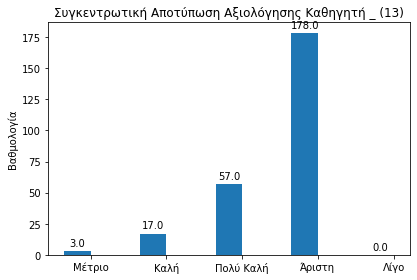

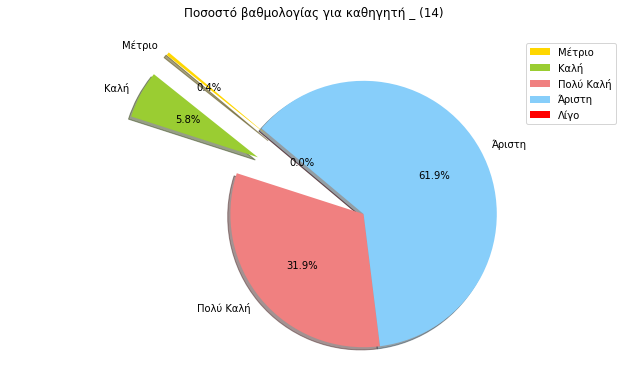

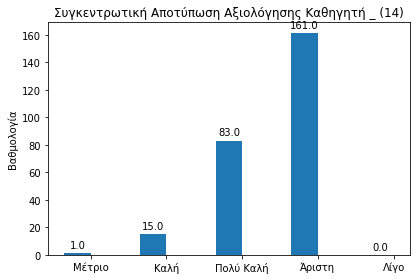

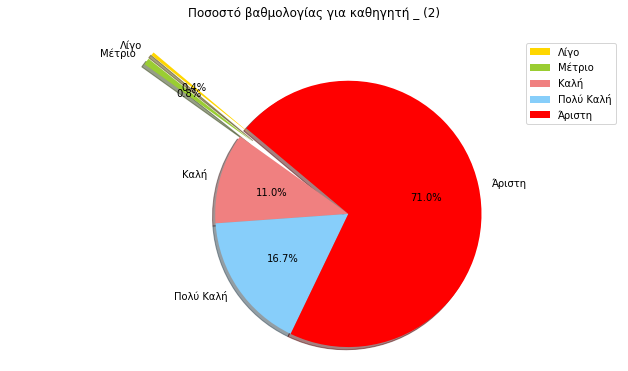

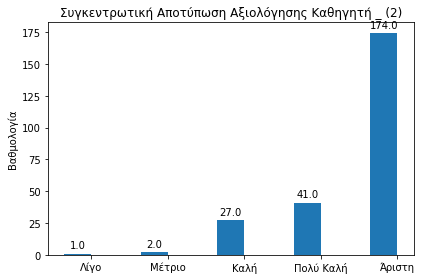

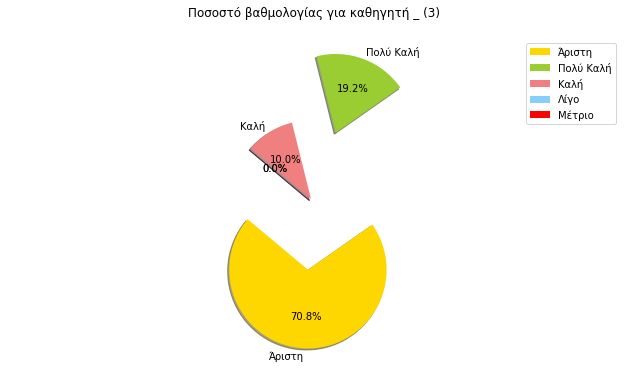

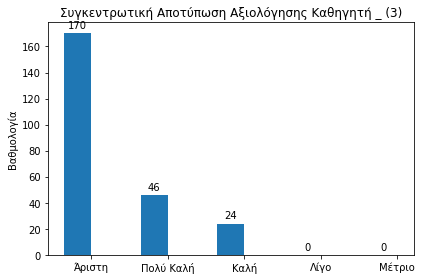

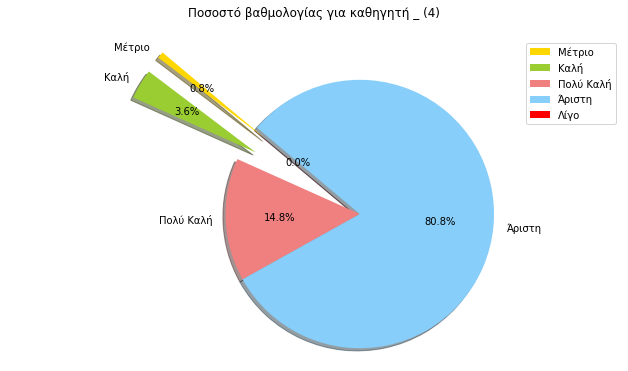

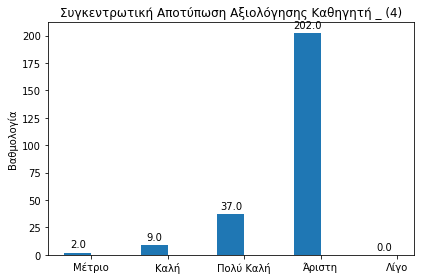

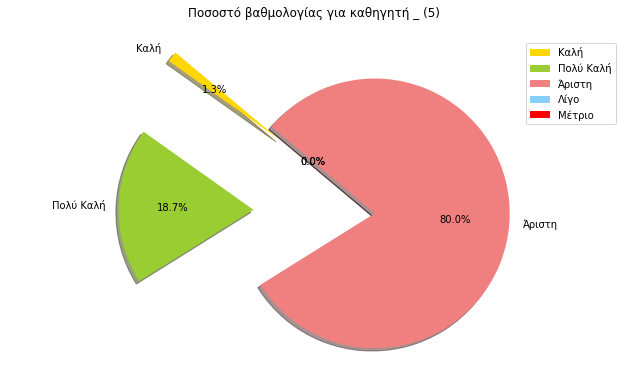

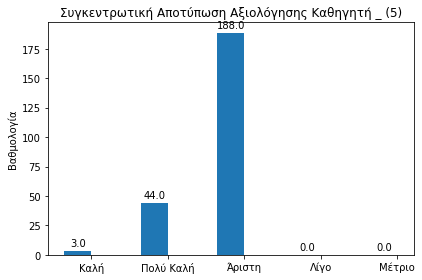

In [5]:

for x in range(len(dataframes)):

 

    test_df = dataframes[x].apply(pd.value_counts)
    test_df =test_df.fillna(0)
    test_df.loc[:,'Sum']= test_df.sum(numeric_only=True, axis=1)
    test = test_df.index.tolist()
    list_num = [1,2,3,4,5]
    list_new = [0,0,0,0,0,0]
    
    if(len(test_df.index)) <5:
        list1 = list_num
        list2 = test
        set1 = set(list1)
        set2 = set(list2)
        missing = list(sorted(set1 - set2))
        for y in range(len(missing)):
         test_df.loc[missing[y]] = list_new 
         
         labels = test_df.index.tolist()
         numbers = test_df['Sum'].tolist()
    else:
    
    
        labels = test_df.index.tolist()
        numbers = test_df['Sum'].tolist()
        
    #explode = (0, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    labels2 = convert_labels(labels)
    plot_pie(labels2,numbers,filenames[x][:-4])
    bar2(labels2,numbers,filenames[x][:-4])
    